In [1]:


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
 
data = pd.read_csv("Ferroalloys Consumption SMP #1.csv")


In [3]:


target_columns = [col for col in data.columns if 'target' in col.lower()]
data[target_columns] = data[target_columns] * 1.025


In [4]:


data['Ferroalloys Overshot (KG/Ton)'] = data['Ferroalloys Actual (KG/Ton)'] - data['Ferroalloys Target (KG/Ton)']
data['FeSiMn Overshot (KG/Ton)'] = data['FeSiMn Actual (KG/Ton)'] - data['FeSiMn Target (KG/Ton)']
data['FeMnHC Overshot (KG/Ton)'] = data['FeMnHC Actual (KG/Ton)'] - data['FeMnHC Target (KG/Ton)']
data['FeSi Overshot (KG/Ton)'] = data['FeSi Actual (KG/Ton)'] - data['FeSi Target (KG/Ton)']
data['FeCr Overshot (KG/Ton)'] = data['FeCr Actual (KG/Ton)'] - data['FeCr Target (KG/Ton)']
data['Recarburizer Overshot (KG/Ton)'] = data['Recarburizer Actual'] - data['Recarburizer Target']



In [5]:


filtered_by_overshot = data[(data["Ferroalloys Overshot (KG/Ton)"] > 0.0) & (data["Ferroalloys Target (KG/Ton)"] != 0)].copy()


In [6]:

overall_ferroalloys =  filtered_by_overshot[["SteelGrade","Ferroalloys Target (KG/Ton)","Ferroalloys Actual (KG/Ton)","Ferroalloys Overshot (KG/Ton)"]]
overall_FeSiMn = filtered_by_overshot[["SteelGrade","FeSiMn Overshot (KG/Ton)", "FeSiMn Target (KG/Ton)","FeSiMn Actual (KG/Ton)","Billet"]]
overall_FeMnHC = filtered_by_overshot[["SteelGrade","FeMnHC Overshot (KG/Ton)","FeMnHC Target (KG/Ton)","FeMnHC Actual (KG/Ton)","Billet"]]
overall_FeSi = filtered_by_overshot[["SteelGrade","FeSi Overshot (KG/Ton)","FeSi Target (KG/Ton)","FeSi Actual (KG/Ton)","Billet"]]
# overall_FeCr = filtered_by_overshot[["SteelGrade","FeCr Overshot (KG/Ton)","FeCr Target (KG/Ton)","FeCr Actual (KG/Ton)","Billet"]]
# overall_Recarburizer = filtered_by_overshot[["SteelGrade","Recarburizer Overshot (KG/Ton)","Recarburizer Target","Recarburizer Actual","Billet"]]


In [7]:


filtered_by_overshot[["SteelGrade","NumberOfHeats","Billet","Total Ferroalloys (KG)","Ferroalloys Target (KG/Ton)","FeSiMn Target (KG/Ton)","FeSiMn Actual (KG/Ton)","FeSiMn Overshot (KG/Ton)"]].style.background_gradient()



,SteelGrade,NumberOfHeats,Billet,Total Ferroalloys (KG),Ferroalloys Target (KG/Ton),FeSiMn Target (KG/Ton),FeSiMn Actual (KG/Ton),FeSiMn Overshot (KG/Ton)
6,AISI 1005-RM03,20,2998.133000,19175,5.012250,4.643250,4.660000,0.016750
7,AISI 1005-RM03,89,13236.458000,91368,5.012250,4.643250,5.220000,0.576750
8,AISI 1006-RM03,63,9652.346000,65159,5.904000,5.196750,5.270000,0.073250
9,AISI 1006-RM03,370,56329.480000,385434,5.904000,5.196750,5.170000,-0.026750
10,AISI 1008-RM03,32,4932.591000,37902,6.160250,5.883500,6.270000,0.386500
11,AISI 1008-RM03,405,61650.462000,502258,6.160250,5.883500,6.230000,0.346500
12,AISI 1010-RM03,9,1386.720000,12753,7.318500,5.565750,6.720000,1.154250
13,AISI 1012-RM03,2,340.998000,3412,7.318500,5.565750,8.030000,2.464250
14,AISI 1012-RM03,51,7888.672000,69957,7.318500,5.565750,7.460000,1.894250
15,AISI 1015-RM03,97,14620.995000,124694,7.318500,5.565750,6.840000,1.274250


In [23]:



def plot_ferroalloys_comparison_modified(dataframe):

    # dataframe = dataframe.drop(columns=["Billet"])
    dataframe = dataframe.sort_values(by="Ferroalloys Overshot (KG/Ton)", ascending=False)

    long_df = dataframe.melt(id_vars="SteelGrade", var_name="Type", value_name="KG/Ton")

    plt.figure(figsize=(18, 10))
    sns.barplot(data=long_df, x="SteelGrade", y="KG/Ton", hue="Type")
    plt.title("Ferroalloys Target vs Actual vs OverShot (KG/Ton) by Steel Grade", fontsize=22)
    plt.xticks(rotation=90, fontsize=14)
    plt.ylabel("KG/Ton", fontsize=24)
    plt.xlabel("Steel Grade", fontsize=24)
    plt.legend(title='', title_fontsize='40', labelspacing=0.95)
    plt.tight_layout()
    plt.show()




def add_suffix_to_duplicates(dataframe, column_name):

    df = dataframe.copy()
    df['counter'] = df.groupby(column_name).cumcount() + 1
    df[column_name] = df.apply(lambda row: f"{row[column_name]}_{row['counter']}", axis=1)
    df.drop('counter', axis=1, inplace=True)

    return df


def calculate_overshot_cost(dataframe, overshot_column_name, cost_per_ton):

    df = dataframe.copy()
    df["KG used " + overshot_column_name] = df[overshot_column_name] * df["Billet"]
    df["Tons used " + overshot_column_name] = df["KG used " + overshot_column_name] / 1000
    df[overshot_column_name + "  Cost"] = df["Tons used " + overshot_column_name ] * cost_per_ton
    return df



In [18]:



def plot_ferroalloys_comparison_modified_2(dataframe):
    # Assuming "OverShot" data is included in the dataframe
    # Filter the dataframe for only OverShot values, then sort by KG/Ton descending
    dataframe = dataframe.sort_values(by="Ferroalloys Overshot (KG/Ton)", ascending=False)
    
    # Get the sorted order of Steel Grades based on OverShot KG/Ton
    sorted_steel_grades = overshot_df["SteelGrade"].tolist()
    
    # Convert the original dataframe to a long format
    long_df = dataframe.melt(id_vars="SteelGrade", var_name="Type", value_name="KG/Ton")
    
    # Ensure the order of SteelGrade in long_df matches the sorted order
    long_df['SteelGrade'] = pd.Categorical(long_df['SteelGrade'], categories=sorted_steel_grades, ordered=True)
    long_df = long_df.sort_values('SteelGrade')

    plt.figure(figsize=(18, 10))
    sns.barplot(data=long_df, x="SteelGrade", y="KG/Ton", hue="Type", order=sorted_steel_grades)
    plt.title("Ferroalloys Target vs Actual vs OverShot (KG/Ton) by Steel Grade", fontsize=22)
    plt.xticks(rotation=90, fontsize=14)
    plt.ylabel("KG/Ton", fontsize=24)
    plt.xlabel("Steel Grade", fontsize=24)
    plt.legend(title='', title_fontsize='18', labelspacing=0.95)
    plt.tight_layout()
    plt.show()

In [20]:


overall_ferroalloys_

,SteelGrade,Ferroalloys Target (KG/Ton),Ferroalloys Actual (KG/Ton),Ferroalloys Overshot (KG/Ton)
6,AISI 1005-RM03_1,5.01225,6.40,1.38775
7,AISI 1005-RM03_2,5.01225,6.90,1.88775
8,AISI 1006-RM03_1,5.90400,6.75,0.84600
9,AISI 1006-RM03_2,5.90400,6.84,0.93600
10,AISI 1008-RM03_1,6.16025,7.68,1.51975
11,AISI 1008-RM03_2,6.16025,8.15,1.98975
12,AISI 1010-RM03_1,7.31850,9.20,1.88150
13,AISI 1012-RM03_1,7.31850,10.01,2.69150
14,AISI 1012-RM03_2,7.31850,8.87,1.55150
15,AISI 1015-RM03_1,7.31850,8.53,1.21150


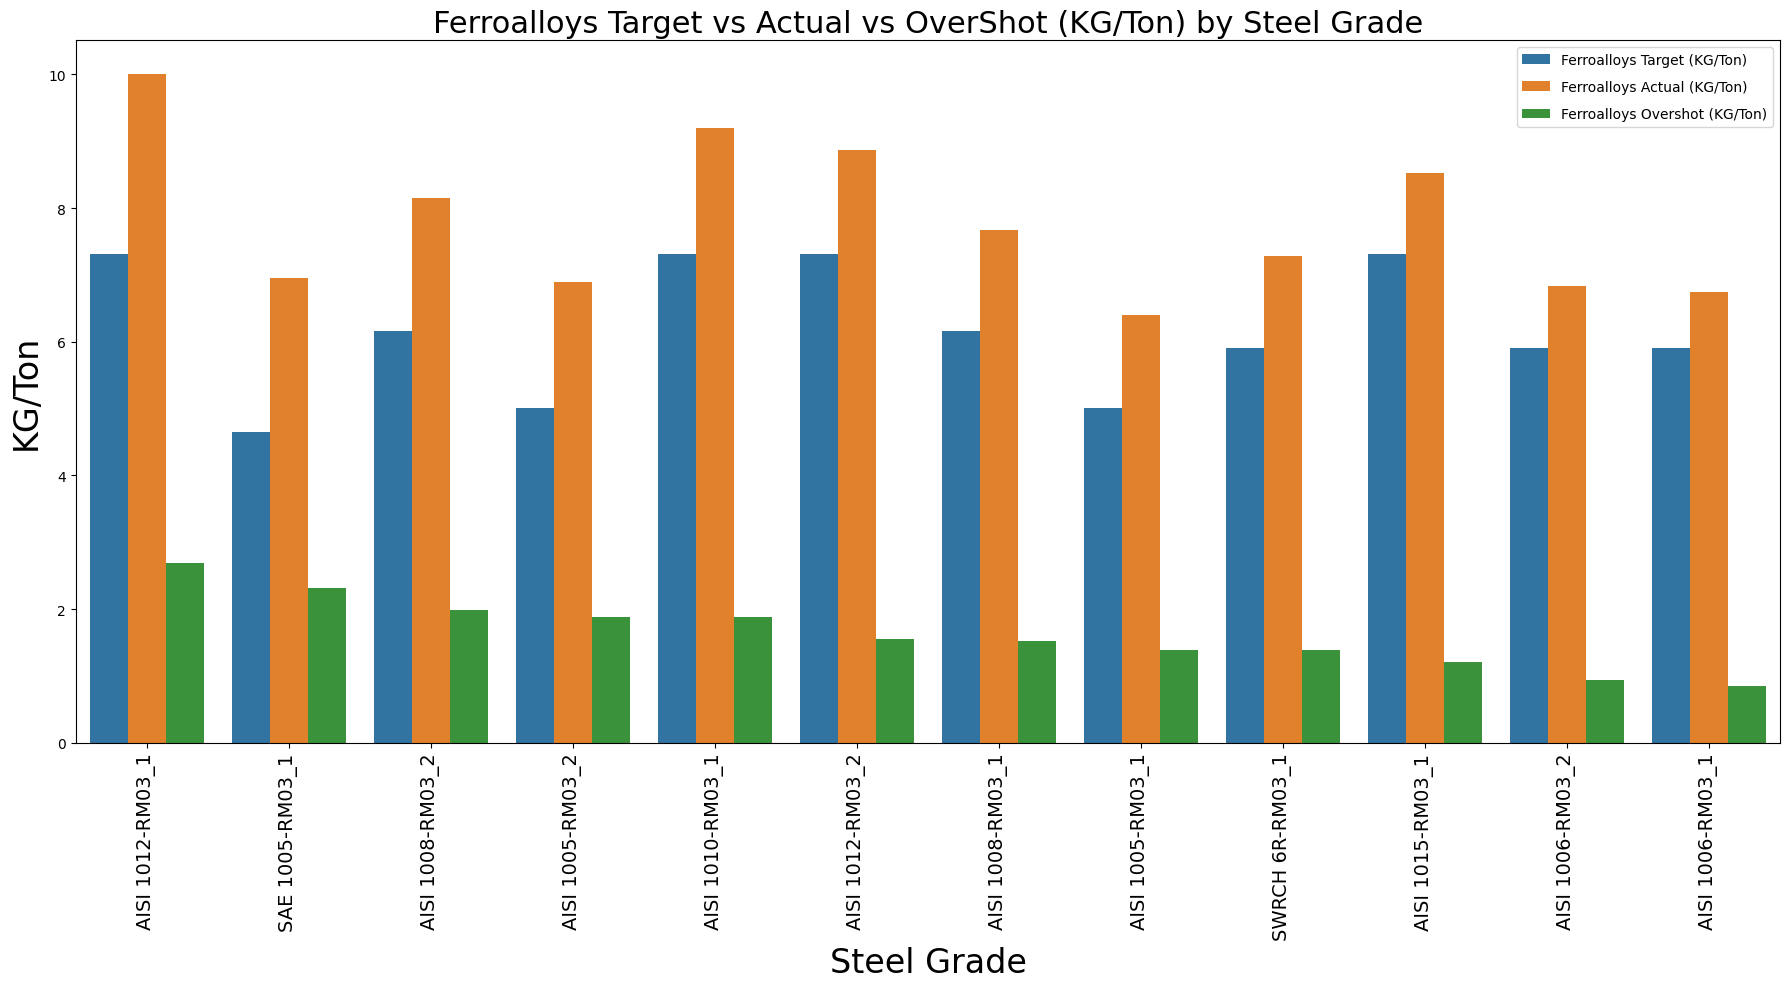

In [24]:

overall_ferroalloys_ = overall_ferroalloys.copy()
target_columns = [col for col in overall_ferroalloys_.columns if 'Target (KG/Ton)' in col]
mask = (overall_ferroalloys_[target_columns] != 0.0).any(axis=1)
overall_ferroalloys_ = overall_ferroalloys_.loc[mask]
overall_ferroalloys_ = add_suffix_to_duplicates(overall_ferroalloys_, 'SteelGrade')
plot_ferroalloys_comparison_modified(overall_ferroalloys_)


# 13 overshot from 2023 smp1 from n number of steel grades.
# sort based on overshot and add more ythicks



In [10]:


overall_ferroalloys_


,SteelGrade,Ferroalloys Target (KG/Ton),Ferroalloys Actual (KG/Ton),Ferroalloys Overshot (KG/Ton)
6,AISI 1005-RM03_1,5.01225,6.40,1.38775
7,AISI 1005-RM03_2,5.01225,6.90,1.88775
8,AISI 1006-RM03_1,5.90400,6.75,0.84600
9,AISI 1006-RM03_2,5.90400,6.84,0.93600
10,AISI 1008-RM03_1,6.16025,7.68,1.51975
11,AISI 1008-RM03_2,6.16025,8.15,1.98975
12,AISI 1010-RM03_1,7.31850,9.20,1.88150
13,AISI 1012-RM03_1,7.31850,10.01,2.69150
14,AISI 1012-RM03_2,7.31850,8.87,1.55150
15,AISI 1015-RM03_1,7.31850,8.53,1.21150


In [11]:

mean_cost_per_ton_FeSiMn = 1198.290427122754
overall_FeSiMn_ = overall_FeSiMn.copy()
target_columns = [col for col in overall_FeSiMn_.columns if 'Target (KG/Ton)' in col]
mask = (overall_FeSiMn_[target_columns] != 0.0).any(axis=1)
overall_FeSiMn_ = overall_FeSiMn_.loc[mask]
overall_FeSiMn_ = add_suffix_to_duplicates(overall_FeSiMn_, 'SteelGrade')
overall_FeSiMn_["KG Used FeSiMn - Overshot"] = overall_FeSiMn_["FeSiMn Overshot (KG/Ton)"]  * overall_FeSiMn_["Billet"]
overall_FeSiMn_["Tons used FeSiMn - Overshot"] = overall_FeSiMn_["KG Used FeSiMn - Overshot"]/1000
overall_FeSiMn_["Overshot FeSiMn Cost"] = overall_FeSiMn_["Tons used FeSiMn - Overshot"] * mean_cost_per_ton_FeSiMn
# overall_FeSiMn_.drop(columns=['Billet','KG Used FeSiMn - Overshot','Tons used FeSiMn - Overshot'],axis=1,inplace=True)
overall_FeSiMn_.style.background_gradient(cmap="Greens")



# df = overall_FeSiMn_.copy()
# df["Overshot FeSiMn Cost"] = df["Overshot FeSiMn Cost"].astype(int)
# 
# fig, ax = plt.subplots(figsize=(18, 10))
# bar_width = 0.30
# 
# r1 = np.arange(len(df))
# r2 = [x + bar_width for x in r1]
# r3 = [x + bar_width for x in r2]
# 
# ax.bar(r1, df['FeSiMn Overshot (KG/Ton)'], color='r', width=bar_width, edgecolor='grey', label='FeSiMn Overshot')
# ax.bar(r2, df['FeSiMn Target (KG/Ton)'], color='b', width=bar_width, edgecolor='grey', label='FeSiMn Target')
# ax.bar(r3, df['FeSiMn Actual (KG/Ton)'], color='g', width=bar_width, edgecolor='grey', label='FeSiMn Actual')
# 
# for idx in range(len(r1)):
#     max_height = max(df.iloc[idx]['FeSiMn Overshot (KG/Ton)'], df.iloc[idx]['FeSiMn Target (KG/Ton)'], df.iloc[idx]['FeSiMn Actual (KG/Ton)'])
#     ax.text(r2[idx], max_height + 0.40, f"${df.iloc[idx]['Overshot FeSiMn Cost']}", ha='center', fontsize=18, fontweight='bold')
# 
# 
# plt.title("Silicon-Maganese Target vs Actual vs Overshot (KG/Ton) by Steel Grade", fontsize=22)
# plt.xticks([r + bar_width for r in range(len(df))], df['SteelGrade'], rotation=45, fontsize=14)
# plt.ylabel("KG/Ton", fontsize=24)   
# plt.xlabel("Steel Grade", fontsize=24)   
# plt.legend(title='', title_fontsize='18', labelspacing=0.95, loc='upper left', bbox_to_anchor=(1, 1))
# plt.tight_layout()
# plt.show()

# we need a table to summarize this information below. 
# important assumption: 
# 0 tolerance mentioned from the plant team.
# mention on the slides the assumption: this analysis is done with no tolerance.
# backup 2



,SteelGrade,FeSiMn Overshot (KG/Ton),FeSiMn Target (KG/Ton),FeSiMn Actual (KG/Ton),Billet,KG Used FeSiMn - Overshot,Tons used FeSiMn - Overshot,Overshot FeSiMn Cost
6,AISI 1005-RM03_1,0.016750,4.643250,4.660000,2998.133000,50.218728,0.050219,60.176621
7,AISI 1005-RM03_2,0.576750,4.643250,5.220000,13236.458000,7634.127151,7.634127,9147.901485
8,AISI 1006-RM03_1,0.073250,5.196750,5.270000,9652.346000,707.034344,0.707034,847.232487
9,AISI 1006-RM03_2,-0.026750,5.196750,5.170000,56329.480000,-1506.813590,-1.506814,-1805.600300
10,AISI 1008-RM03_1,0.386500,5.883500,6.270000,4932.591000,1906.446421,1.906446,2284.476497
11,AISI 1008-RM03_2,0.346500,5.883500,6.230000,61650.462000,21361.885083,21.361885,25597.742400
12,AISI 1010-RM03_1,1.154250,5.565750,6.720000,1386.720000,1600.621560,1.600622,1918.009493
13,AISI 1012-RM03_1,2.464250,5.565750,8.030000,340.998000,840.304321,0.840304,1006.928624
14,AISI 1012-RM03_2,1.894250,5.565750,7.460000,7888.672000,14943.116936,14.943117,17906.193976
15,AISI 1015-RM03_1,1.274250,5.565750,6.840000,14620.995000,18630.802879,18.630803,22325.112739


In [12]:
target_test = 10 # basic (optimistic)
upper_bound = target_test * 1.025 # (conservative)
print(upper_bound)

10.25


In [13]:

Chem ="FeSi"

mean_cost_per_ton_FeSi = 1414.2645773965974
overall_FeSi_ = overall_FeSi.copy()
target_columns = [col for col in overall_FeSi_.columns if 'Target (KG/Ton)' in col]
mask = (overall_FeSi_[target_columns] != 0.0).any(axis=1)
overall_FeSi_ = overall_FeSi_.loc[mask]
overall_FeSi_ = add_suffix_to_duplicates(overall_FeSi_, 'SteelGrade')
overall_FeSi_["KG Used FeSi - Overshot"] = overall_FeSi_["FeSi Overshot (KG/Ton)"]  * overall_FeSi_["Billet"]
overall_FeSi_["Tons used FeSi - Overshot"] = overall_FeSi_["KG Used FeSi - Overshot"]/1000
overall_FeSi_["Overshot FeSi Cost"] = overall_FeSi_["Tons used FeSi - Overshot"] * mean_cost_per_ton_FeSi
# overall_FeSi_.drop(columns=['Billet','KG Used FeSi - Overshot','Tons used FeSi - Overshot'],axis=1,inplace=True)
overall_FeSiMn_.style.background_gradient(cmap="Reds")

# df = overall_FeSi_.copy()
# df["Overshot FeSi Cost"] = df["Overshot FeSi Cost"].astype(int)
# 
# fig, ax = plt.subplots(figsize=(18, 10))
# bar_width = 0.30
# 
# r1 = np.arange(len(df))
# r2 = [x + bar_width for x in r1]
# r3 = [x + bar_width for x in r2]
# 
# ax.bar(r1, df['FeSi Overshot (KG/Ton)'], color='r', width=bar_width, edgecolor='grey', label='FeSi Overshot')
# ax.bar(r2, df['FeSi Target (KG/Ton)'], color='b', width=bar_width, edgecolor='grey', label='FeSi Target')
# ax.bar(r3, df['FeSi Actual (KG/Ton)'], color='g', width=bar_width, edgecolor='grey', label='FeSi Actual')
# 
# for idx in range(len(r1)):
#     max_height = max(df.iloc[idx]['FeSi Overshot (KG/Ton)'], df.iloc[idx]['FeSi Target (KG/Ton)'], df.iloc[idx]['FeSi Actual (KG/Ton)'])
#     ax.text(r2[idx], max_height + 0.05, f"${df.iloc[idx]['Overshot FeSi Cost']}", ha='center', fontsize=14, fontweight='bold')
# 
# 
# plt.title("Ferro-Silicon Target vs Actual vs Overshot (KG/Ton) by Steel Grade", fontsize=22)
# plt.xticks([r + bar_width for r in range(len(df))], df['SteelGrade'], rotation=45, fontsize=14)
# plt.ylabel("KG/Ton", fontsize=24)   
# plt.xlabel("Steel Grade", fontsize=24)   
# plt.legend(title='', title_fontsize='18', labelspacing=0.95, loc='upper left', bbox_to_anchor=(1, 1))
# 
# plt.tight_layout()
# plt.show()






,SteelGrade,FeSiMn Overshot (KG/Ton),FeSiMn Target (KG/Ton),FeSiMn Actual (KG/Ton),Billet,KG Used FeSiMn - Overshot,Tons used FeSiMn - Overshot,Overshot FeSiMn Cost
6,AISI 1005-RM03_1,0.016750,4.643250,4.660000,2998.133000,50.218728,0.050219,60.176621
7,AISI 1005-RM03_2,0.576750,4.643250,5.220000,13236.458000,7634.127151,7.634127,9147.901485
8,AISI 1006-RM03_1,0.073250,5.196750,5.270000,9652.346000,707.034344,0.707034,847.232487
9,AISI 1006-RM03_2,-0.026750,5.196750,5.170000,56329.480000,-1506.813590,-1.506814,-1805.600300
10,AISI 1008-RM03_1,0.386500,5.883500,6.270000,4932.591000,1906.446421,1.906446,2284.476497
11,AISI 1008-RM03_2,0.346500,5.883500,6.230000,61650.462000,21361.885083,21.361885,25597.742400
12,AISI 1010-RM03_1,1.154250,5.565750,6.720000,1386.720000,1600.621560,1.600622,1918.009493
13,AISI 1012-RM03_1,2.464250,5.565750,8.030000,340.998000,840.304321,0.840304,1006.928624
14,AISI 1012-RM03_2,1.894250,5.565750,7.460000,7888.672000,14943.116936,14.943117,17906.193976
15,AISI 1015-RM03_1,1.274250,5.565750,6.840000,14620.995000,18630.802879,18.630803,22325.112739


In [14]:


overall_FeSiMn_["Overshot FeSiMn Cost"].sum() + overall_FeSi_["Overshot FeSi Cost"].sum()



259284.74009693344

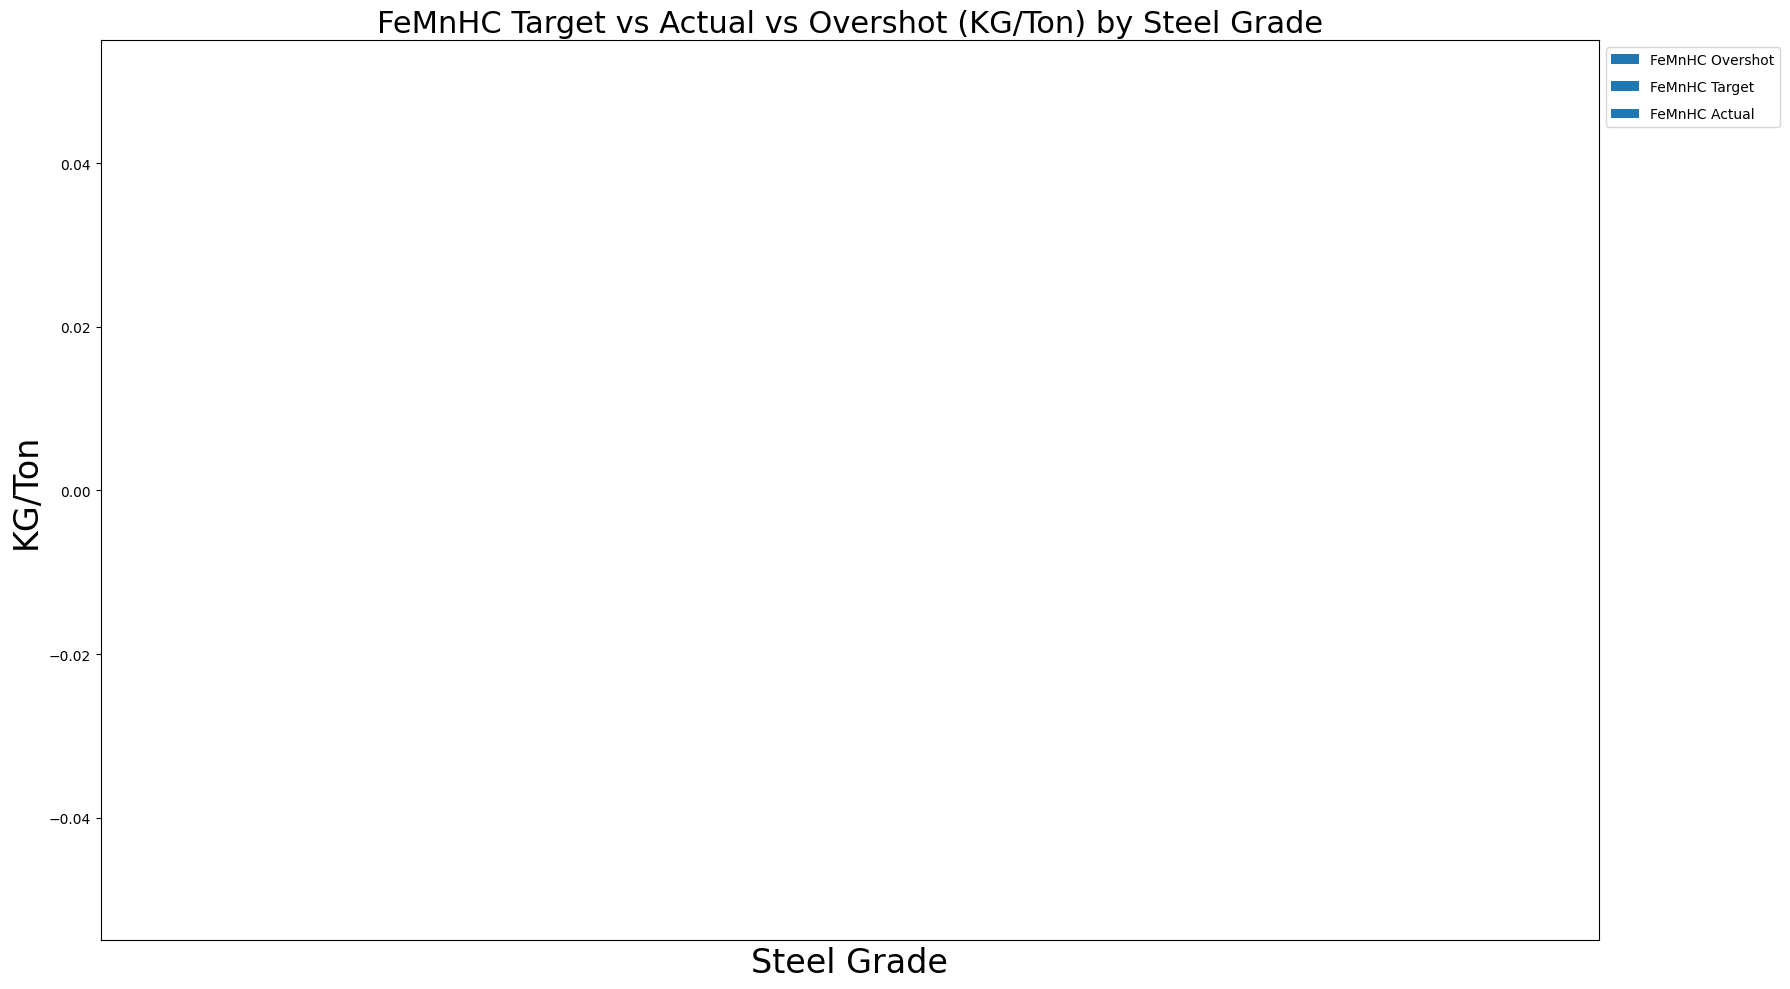

In [15]:


mean_cost_per_ton_FeMnHC = 1414.2645773965974
overall_FeMnHC_ = overall_FeMnHC.copy()
target_columns = [col for col in overall_FeMnHC_.columns if 'Target (KG/Ton)' in col]
mask = (overall_FeMnHC_[target_columns] != 0.0).any(axis=1)
overall_FeMnHC_ = overall_FeMnHC_.loc[mask]
overall_FeMnHC_ = add_suffix_to_duplicates(overall_FeMnHC_, 'SteelGrade')
overall_FeMnHC_["KG Used FeMnHC - Overshot"] = overall_FeMnHC_["FeMnHC Overshot (KG/Ton)"]  * overall_FeMnHC_["Billet"]
overall_FeMnHC_["Tons used FeMnHC - Overshot"] = overall_FeMnHC_["KG Used FeMnHC - Overshot"]/1000
overall_FeMnHC_["Overshot FeMnHC Cost"] = overall_FeMnHC_["Tons used FeMnHC - Overshot"] * mean_cost_per_ton_FeMnHC
overall_FeMnHC_.drop(columns=['Billet','KG Used FeMnHC - Overshot','Tons used FeMnHC - Overshot'],axis=1,inplace=True)
overall_FeMnHC_



df = overall_FeMnHC_.copy()
df["Overshot FeMnHC Cost"] = df["Overshot FeMnHC Cost"].astype(int)

fig, ax = plt.subplots(figsize=(18, 10))
bar_width = 0.30

r1 = np.arange(len(df))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

ax.bar(r1, df['FeMnHC Overshot (KG/Ton)'], color='r', width=bar_width, edgecolor='grey', label='FeMnHC Overshot')
ax.bar(r2, df['FeMnHC Target (KG/Ton)'], color='b', width=bar_width, edgecolor='grey', label='FeMnHC Target')
ax.bar(r3, df['FeMnHC Actual (KG/Ton)'], color='g', width=bar_width, edgecolor='grey', label='FeMnHC Actual')

for idx in range(len(r1)):
    max_height = max(df.iloc[idx]['FeMnHC Overshot (KG/Ton)'], df.iloc[idx]['FeMnHC Target (KG/Ton)'], df.iloc[idx]['FeMnHC Actual (KG/Ton)'])
    ax.text(r2[idx], max_height + 0.05, f"${df.iloc[idx]['Overshot FeMnHC Cost']}", ha='center', fontsize=14, fontweight='bold')


plt.title("FeMnHC Target vs Actual vs Overshot (KG/Ton) by Steel Grade", fontsize=22)
plt.xticks([r + bar_width for r in range(len(df))], df['SteelGrade'], rotation=45, fontsize=14)
plt.ylabel("KG/Ton", fontsize=24)  # Increased fontsize for y-axis title
plt.xlabel("Steel Grade", fontsize=24)  # Increased fontsize for x-axis title
plt.legend(title='', title_fontsize='18', labelspacing=0.95, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()




KeyError: 'FeSiMn Overshot (KG/Ton)'

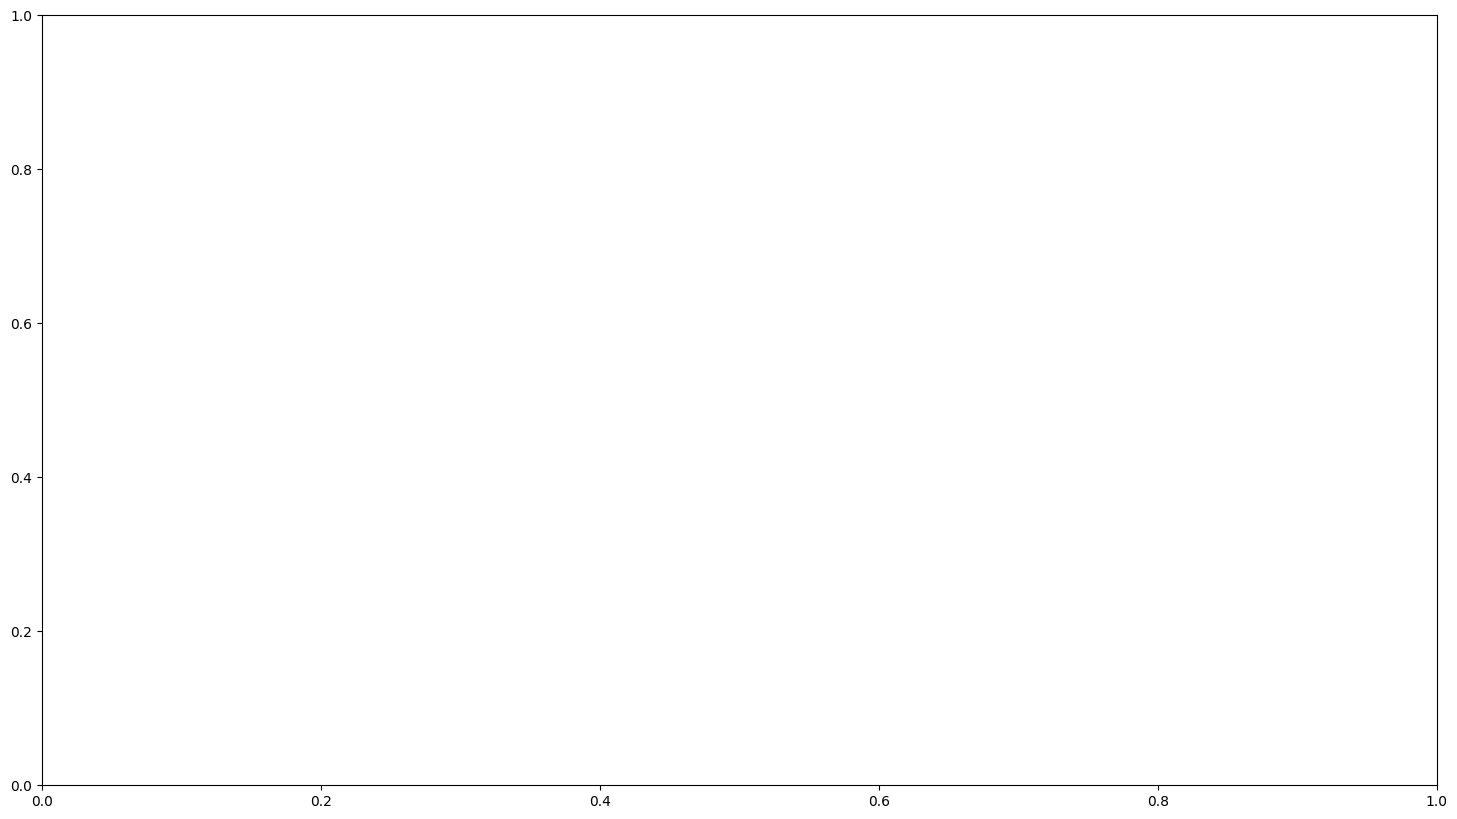

In [16]:

# Set up for a stacked bar chart
fig, ax = plt.subplots(figsize=(18, 10))

# Positions for each steel grade
positions = np.arange(len(df['SteelGrade']))

# Plotting stacked bars
ax.bar(positions, df['FeSiMn Overshot (KG/Ton)'], color='b', edgecolor='grey', width=0.5, label='FeSiMn Overshot')
ax.bar(positions, df['FeSiMn Target (KG/Ton)'], bottom=df['FeSiMn Overshot (KG/Ton)'], color='r', edgecolor='grey', width=0.5, label='FeSiMn Target')
ax.bar(positions, df['FeSiMn Actual (KG/Ton)'], bottom=df['FeSiMn Overshot (KG/Ton)'] + df['FeSiMn Target (KG/Ton)'], color='g', edgecolor='grey', width=0.5, label='FeSiMn Actual')

# Annotations for 'Overshot FeSiMn Cost'
for idx, val in enumerate(positions):
    total_height = df.iloc[idx]['FeSiMn Overshot (KG/Ton)'] + df.iloc[idx]['FeSiMn Target (KG/Ton)'] + df.iloc[idx]['FeSiMn Actual (KG/Ton)']
    ax.text(val, total_height + 0.05, f"${df.iloc[idx]['Overshot FeSiMn Cost']}", ha='center')

# Adjusting the plot
plt.title("FeSiMn Target vs Actual vs Overshot (KG/Ton) by Steel Grade", fontsize=18)
plt.xticks(positions, df['SteelGrade'], rotation=45, fontsize="x-large")
plt.ylabel("Cumulative KG/Ton", fontsize="xx-large")
plt.xlabel("Steel Grade", fontsize="xx-large")
plt.legend(title='', title_fontsize='13', labelspacing=0.95)

plt.tight_layout()
plt.show()








## Composition Consumption and Cost Calculation

To accurately calculate the composition consumption and its corresponding cost for a given grade of steel, we follow a two-step process. This approach first determines the actual amount of composition used in kilograms (kg) and then calculates the cost based on the price per ton.

### Step 1: Calculate Composition Consumption in Kilograms (kg)

Given variables:
- `C` = Composition consumption rate in kg of composition per ton of billets
- `T` = Tons of billets produced

The formula to calculate the actual consumption of the composition (`A`) in kilograms (kg) for that grade of steel is:

$$A = C \times T$$

### Step 2: Convert Consumption into Cost

Given additional variable:
$$ `P` = Price of the sheet (or composition) per ton$$

Since the price `P` is provided per ton, and there are 1000 kg in a ton, we first convert the actual consumption from kilograms to tons (`A_tons`):

$$[A_{\text{tons}} = \frac{A}{1000}]$$

To calculate the total cost (`Cost`) of the composition based on its consumption and the sheet price per ton, we use the formula:

$$\[Cost = A_{\text{tons}} \times P\]$$

Combining the steps, we get the comprehensive formula for calculating cost:

$$\[Cost = \left( \frac{C \times T}{1000} \right) \times P\]$$

This formula allows us to calculate the total cost of the composition used based on its consumption rate per ton of billets produced, the total tons of billets produced, and the price per ton of the composition.
 
composition consumption in kg/ton * tons of billets produced = composition consumption in KG 
 1.   kg/ton * ton = kg you get the actual consumption of composition for that grade steel 
 2.   from 1, divide by 1000 to get ton, multiply the result by tth sheet price ton * (sheet price since its per ton) per composition.



## Prices for SMP1 Chemicals:


In [ ]:


list_names_prices_smp1_december_2023 = {
    "FeSi - Ferro-Silicon":1562.52739907045,
    "FeSiMn - Silicon-maganese":986.290575415916,
    "FeMnHC - Ferro-Manganese (High Carbon)":1072.38676864388,
    "Recarburizer - Recarburizer":458.476134255355,
    'FeCr- ':0.0
}


list_names_prices_smp1_februrary_2024 = {
    "FeSi - Ferro-Silicon":1270.64396322791,
    "FeSiMn - Silicon-maganese":979.950501617602,
    "FeMnHC - Ferro-Manganese (High Carbon)":987.256404306629,
    "Recarburizer - Recarburizer":987.256404306629,
    'FeCr- ':0.0
}

list_names_prices_smp1_january_2024 = {
    "FeSi - Ferro-Silicon": 1321.21231855097 ,
    "FeSiMn - Silicon-maganese":980.828990060272,
    "FeMnHC - Ferro-Manganese (High Carbon)":1007.05074893469,
    "Recarburizer - Recarburizer":399.359191290486,
    'FeCr- ':0.0
}

list_names_prices_smp1_november_2023 = {
    "FeSi - Ferro-Silicon":1502.67462873706,
    "FeSiMn - Silicon-maganese":1082.79640299379,
    "FeMnHC - Ferro-Manganese (High Carbon)":1072.38799230385,
    "Recarburizer - Recarburizer":476.633106575964,
    'FeCr- ':0.0
}


# Convert dictionaries to a DataFrame
df = pd.DataFrame([
    list_names_prices_smp1_december_2023,
    list_names_prices_smp1_februrary_2024,
    list_names_prices_smp1_january_2024,
    list_names_prices_smp1_november_2023
])

mean_prices = df.mean()

list_names_prices_smp1_mean = mean_prices.to_dict()

list_names_prices_smp1_mean
